<a href="https://colab.research.google.com/github/rathinampraveen/CODSOFT/blob/main/TASK_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to a new SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Create a simple sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")

In [4]:
# Insert sample sales data
sales_data = [
    ('Widget A', 10, 5.99),
    ('Widget B', 5, 9.99),
    ('Widget A', 7, 5.99),
    ('Widget C', 3, 14.99),
    ('Widget B', 2, 9.99),
    ('Widget C', 6, 14.99)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

conn.commit()
conn.close()

In [6]:
# Connect to the database
conn = sqlite3.connect("sales_data.db")

In [7]:
# Query to fetch total quantity and total revenue per product
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

In [8]:
# Load into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

In [9]:
# Print basic sales summary
print("Sales Summary:\n")
print(df)

Sales Summary:

    product  total_quantity  total_revenue
0  Widget A              17         101.83
1  Widget B               7          69.93
2  Widget C               9         134.91


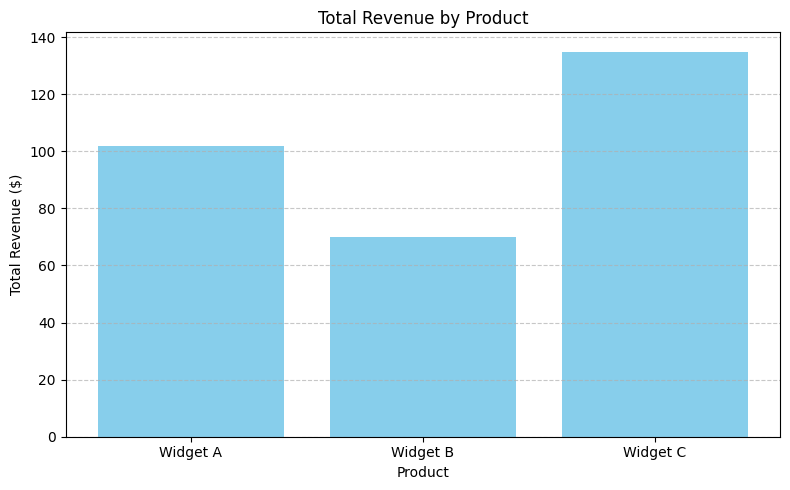

In [10]:
# Plot the total revenue per product
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()